In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
train_df = pd.read_csv('data/HeadHunter_train.csv')
test_df = pd.read_csv('data/HeadHunter_test.csv')

In [48]:
train_df.target = train_df.target.str.split(',')
train_df = train_df.explode('target')

In [64]:
general_df = train_df.append(test_df).reset_index(drop=True)

In [141]:
general_df.query('target == "8"')[['positive', 'negative']].head(10).to_numpy()

array([['Расположение офиса, своего рода стабильность (госбанк)',
        'Упростить процессы - все процессы ради процессов, а не результата. Избавиться от чрезмерного уровня бюрократии. Внедрить нормальный электронный документооборот - сейчас все на бумажках, даже то, что заводится в ЭДО. Высшему руководству избавиться от нежелания видеть проблемы - сейчас действует принцип «не вижу проблемы, значит ее нет».'],
       ['В принципе норм.Работать можно',
        'Всегда есть к чему стремиться'],
       ['Ужасно , просто совдепия, зарплата нищенская',
        'Там надо всё улучшать, место дно.'],
       ['Норм норм норм норм норм', 'Ниче ниче ниче гтчн ниче'],
       ['Ничего не нравится. Это лично моё мнение',
        'Негативное отношение к сотрудникам, если они имели неосторожность сходить на больничный'],
       ['Коллектив хороший, руководитель странный, обучение на 3',
        'Это просто шаражкина контора, огромная тякучка'],
       ['Крупная компания, узнаваемый бренд',
        '

In [123]:
general_df['positive_len'] = general_df.positive.str.len()
general_df['negative_len'] = general_df.negative.str.len()
general_df['position_len'] = general_df.position.str.len()

popular_city = general_df.city.value_counts()[:20].index
general_df['city_cat'] = general_df.city.apply(lambda x: x if x in popular_city else 'Other')

<Figure size 1152x1152 with 0 Axes>

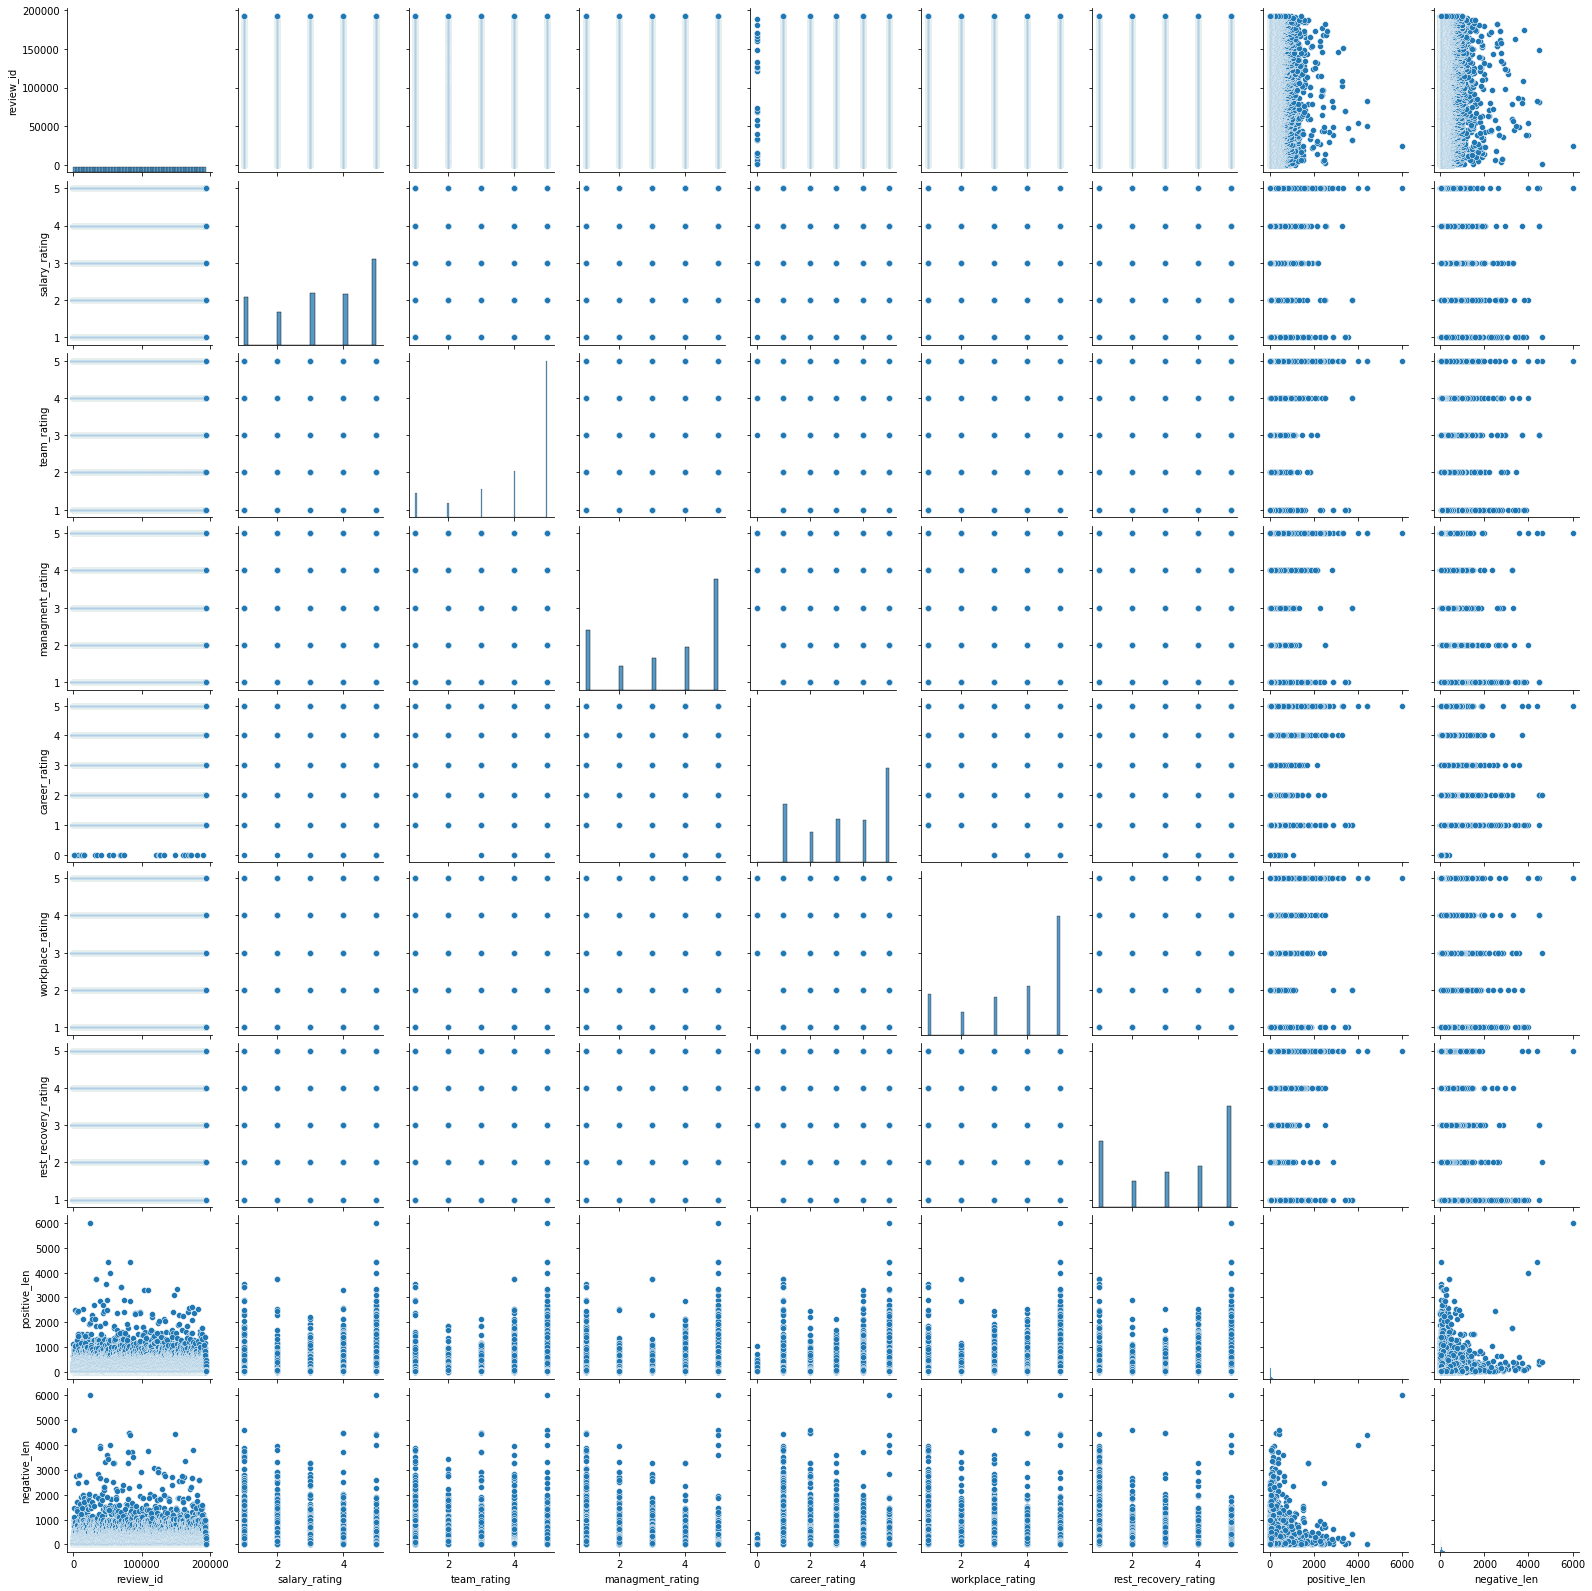

In [100]:
plt.figure(figsize=(16, 16))
sns.pairplot(general_df.drop(['positive', 'negative', 'position', 'city', 'city_cat'], axis=1))
plt.show()

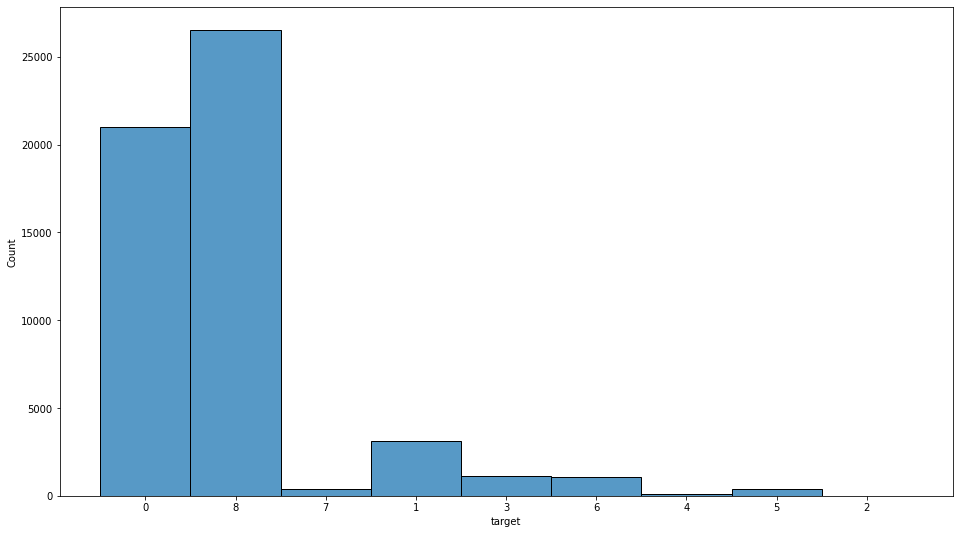

In [87]:
plt.figure(figsize=(16, 9))
sns.histplot(data=general_df, x='target')
plt.show()

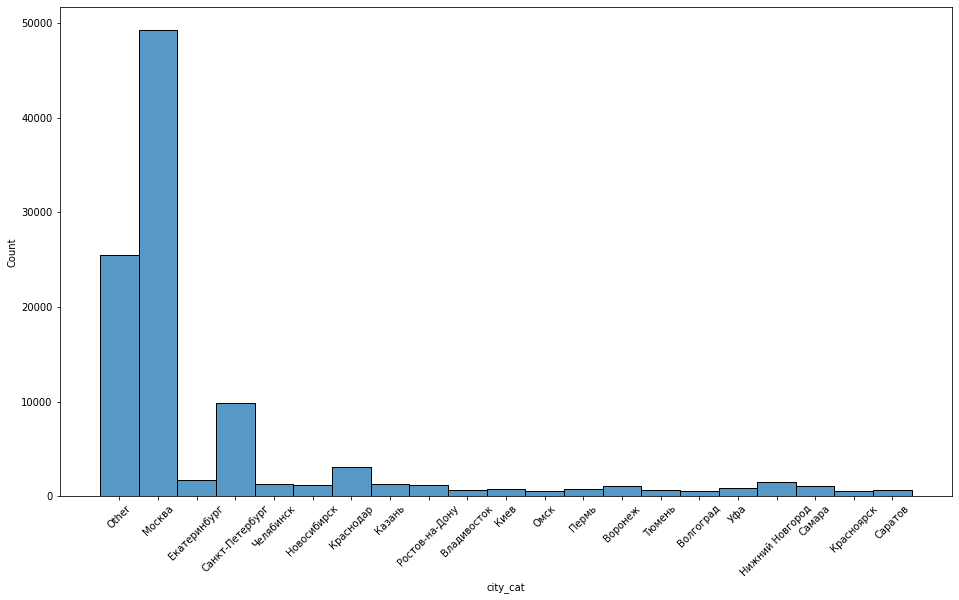

In [90]:
plt.figure(figsize=(16, 9))
sns.histplot(data=general_df, x='city_cat')
plt.xticks(rotation=45)
plt.show()

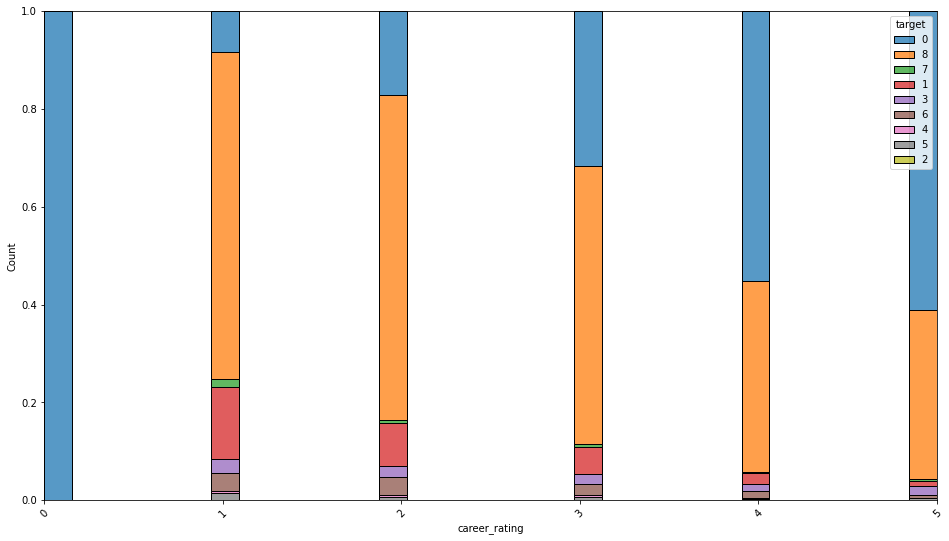

In [105]:
plt.figure(figsize=(16, 9))
sns.histplot(data=general_df, x='career_rating', hue='target', multiple='fill')
plt.xticks(rotation=45)
plt.show()

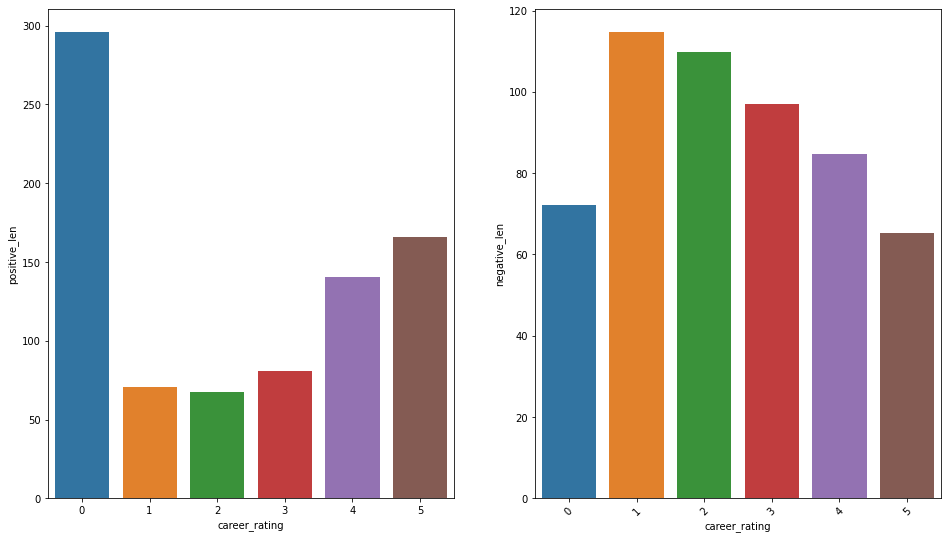

In [122]:
_, axes = plt.subplots(1, 2, figsize=(16, 9))
grouped_by_career_rating = general_df.groupby('career_rating').agg({'positive_len': 'mean', 'negative_len': 'mean'}).reset_index()

sns.barplot(
    data=grouped_by_career_rating, 
    y='positive_len',
    x='career_rating', 
    ax=axes[0]
)
sns.barplot(
    data=grouped_by_career_rating, 
    y='negative_len',
    x='career_rating', 
    ax=axes[1]
)
plt.xticks(rotation=45)
plt.show()

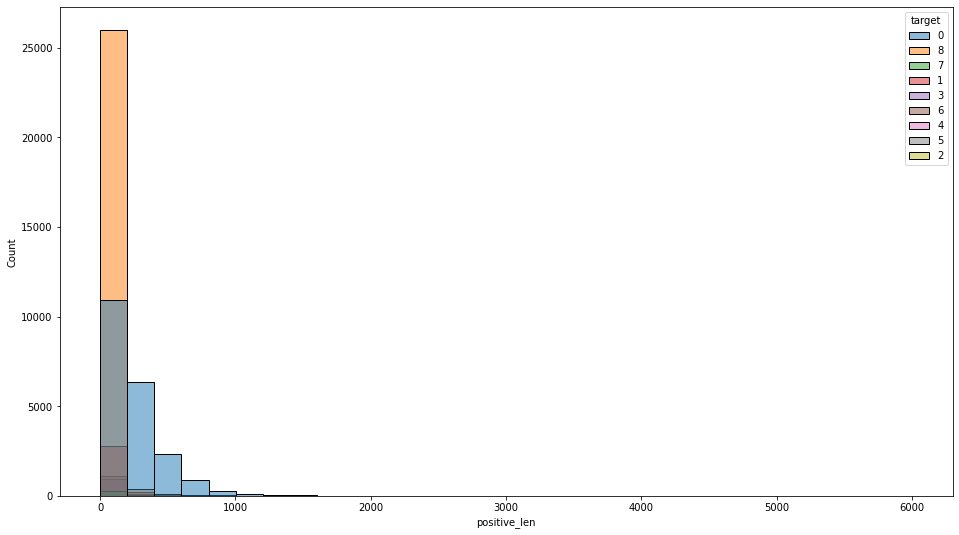

In [91]:
plt.figure(figsize=(16, 9))
sns.histplot(data=general_df, x='positive_len', bins=30, hue='target')
plt.show()

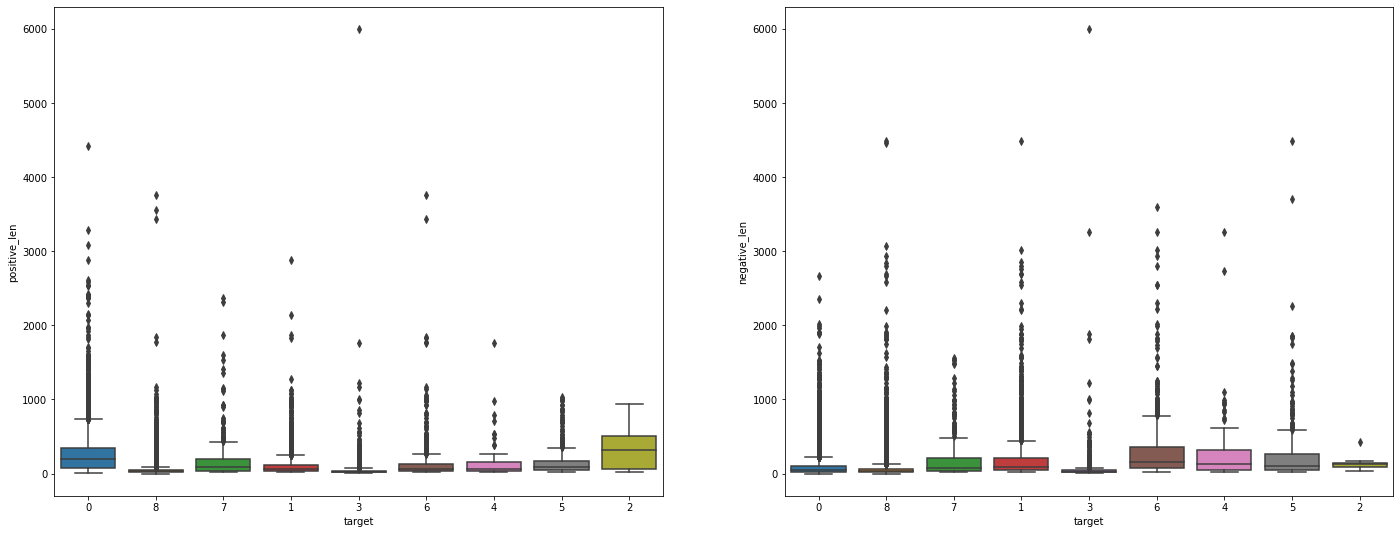

In [92]:
_, axes = plt.subplots(1, 2, figsize=(24, 9))
sns.boxplot(data=general_df, y='positive_len', x='target', ax=axes.flat[0])
sns.boxplot(data=general_df, y='negative_len', x='target', ax=axes.flat[1])
plt.show()

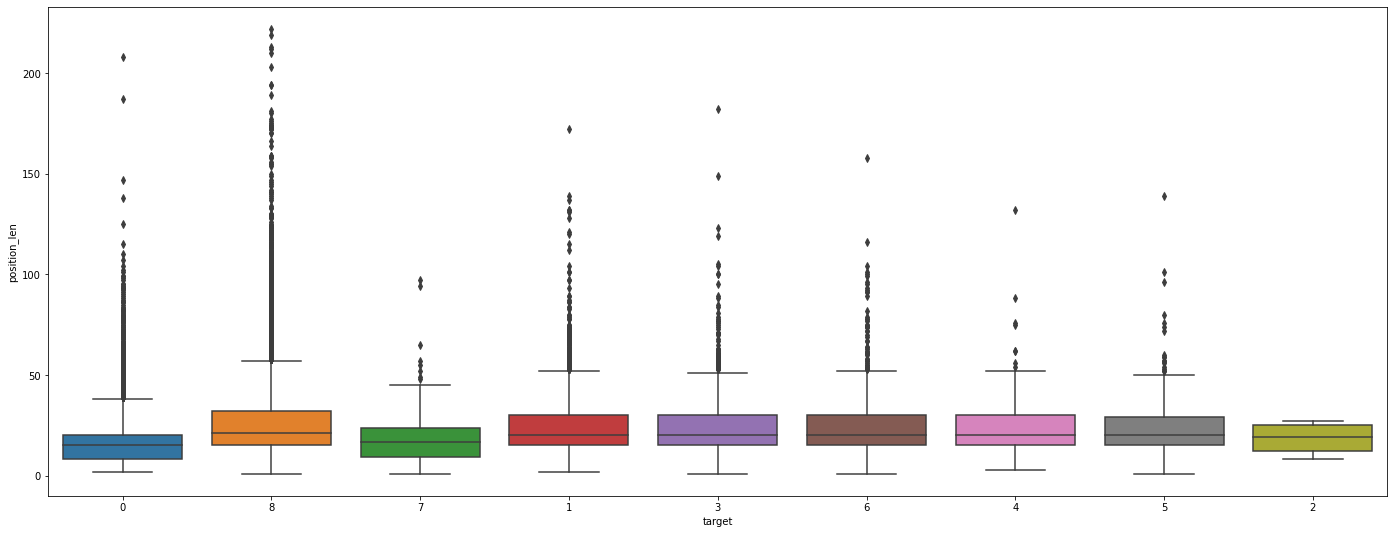

In [128]:
_, axes = plt.subplots(1, 1, figsize=(24, 9))
sns.boxplot(data=general_df, y='position_len', x='target', ax=axes)
plt.show()

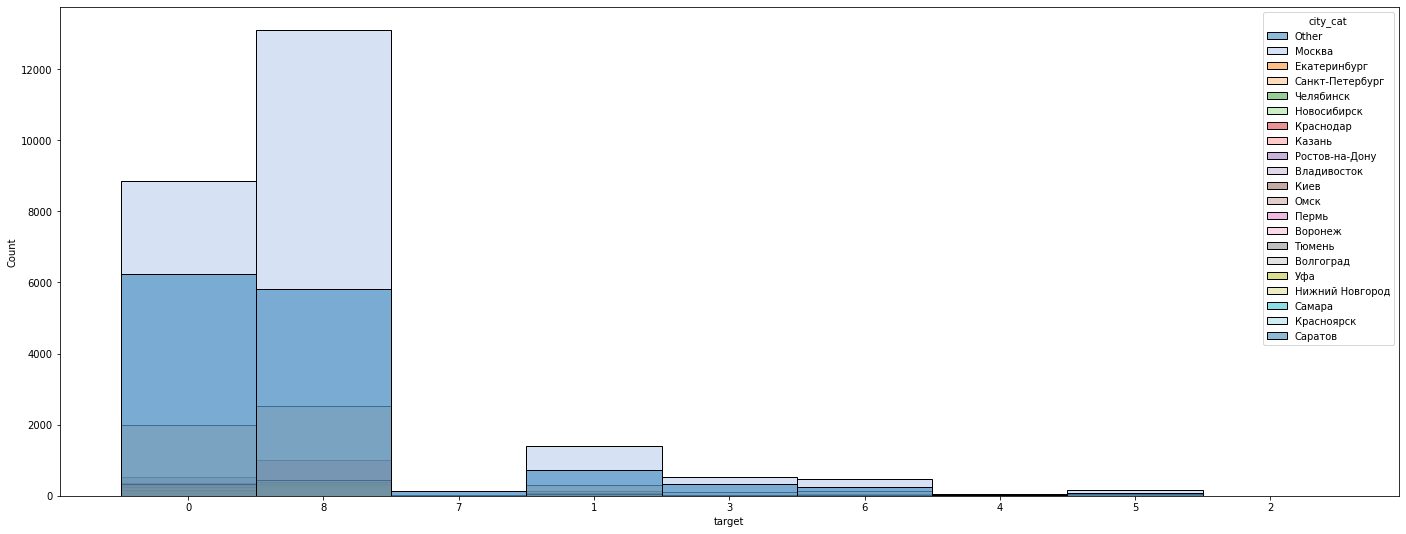

In [93]:
plt.figure(figsize=(24, 9))
sns.histplot(data=general_df, x='target', hue='city_cat', palette='tab20')
plt.show()

In [ ]:
plt.figure(figsize=(24, 9))
sns.histplot(data=general_df, x='target', hue='city_cat', palette='tab20')
plt.show()